# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))
dog_classes = np.array(glob("/data/dog_images/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

(250, 250, 3)
Number of faces detected: 1


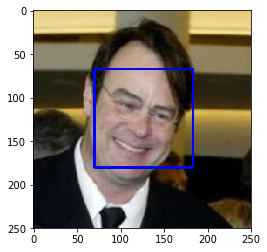

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])

print(img.shape)
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_count = 0
dog_count = 0
for i in tqdm(range(len(human_files_short)), desc = "human face detection progress" ):
    human_count += int(face_detector(human_files_short[i]))
    dog_count += int(face_detector(dog_files_short[i]))
    
print(f"Accuracy of human face detection in human files: {human_count/len(human_files_short) * 100} %")
print(f"False positives of human face detection in dog files: {dog_count/len(dog_files_short) * 100} %")
        


human face detection progress: 100%|██████████| 100/100 [01:21<00:00,  3.27it/s]

Accuracy of human face detection in human files: 98.0 %
False positives of human face detection in dog files: 17.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [4]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
for param in VGG16.parameters():
    param.requires_grad_(False)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:26<00:00, 21088937.92it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path).convert('RGB')
    in_transform = transforms.Compose([transforms.Resize(224),
                                       transforms.CenterCrop(224), 
                                       transforms.ToTensor(), 
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) 
    image_tensor = in_transform(img).unsqueeze(0)
    
    if use_cuda:
        image_tensor = image_tensor.cuda()
        
    output = VGG16(image_tensor) #outputs class scores 1x1000
        
    
    _, pred_class = torch.max(output, 1)
    
    return pred_class.item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [6]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    class_pred = VGG16_predict(img_path)
    return (class_pred in range(151, 269)) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
count = 0
for img_path in human_files_short:
    count += int(dog_detector(img_path))
print(f"Dogs detected in human_files_short: {count/len(human_files_short)*100}")

count = 0
for img_path in dog_files_short:
    count += int(dog_detector(img_path))
print(f"Dogs detected in dog_files_short: {count/len(dog_files_short)*100}")

Dogs detected in human_files_short: 0.0
Dogs detected in dog_files_short: 100.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [4]:
import numpy as np
from glob import glob
import cv2
from tqdm import tqdm

def get_dataset_mean_std():
    train_dog_files = np.array(glob("/data/dog_images/train/*/*"))
    mean = np.zeros(3)
    std = np.zeros(3)
    for i in tqdm(range(len(train_dog_files))):
        img = cv2.imread(train_dog_files[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255.0 # now image lies between 0 and 1
        mean += np.array([np.mean(img[:,:,0]), 
                          np.mean(img[:,:,1]), 
                          np.mean(img[:,:,2])])
        std += np.array([np.std(img[:,:,0]), 
                          np.std(img[:,:,1]), 
                          np.std(img[:,:,2])])
    mean = mean/len(train_dog_files)
    std = std/len(train_dog_files)
        
    return mean, std

mean, std = get_dataset_mean_std()

print(mean, std)

100%|██████████| 6680/6680 [02:32<00:00, 43.86it/s]

[ 0.48702649  0.46650031  0.39717709] [ 0.23467595  0.23012579  0.22998373]


In [7]:
import os
import torch
from torchvision import datasets, transforms

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
# check if CUDA is available
use_cuda = torch.cuda.is_available()
batch_size = 30

root = '/data/dog_images'
train_dir = os.path.join(root, 'train')
valid_dir = os.path.join(root, 'valid')
test_dir = os.path.join(root, 'test')

mean_train_set = [0.48702649, 0.46650031, 0.39717709] 
std_train_set = [0.23467595, 0.23012579, 0.22998373]

def get_data_loaders(dataset_mean, dataset_std, resize, center_crop_size):
    train_transform = transforms.Compose([transforms.RandomResizedCrop(center_crop_size),
                                          transforms.RandomHorizontalFlip(),
                                          transforms.ToTensor(),
                                          transforms.Normalize(dataset_mean, dataset_std)])

    test_transform = transforms.Compose([transforms.Resize(resize), 
                                         transforms.CenterCrop(center_crop_size), 
                                         transforms.ToTensor(),
                                         transforms.Normalize(dataset_mean, dataset_std)])

    data = {'train': datasets.ImageFolder(train_dir, transform=train_transform),
            'valid': datasets.ImageFolder(valid_dir, transform=test_transform),
            'test': datasets.ImageFolder(test_dir, transform=test_transform)}

    loaders = {'train': torch.utils.data.DataLoader(data['train'], batch_size=batch_size, shuffle=True),
                       'valid': torch.utils.data.DataLoader(data['valid'], batch_size=batch_size), 
                       'test': torch.utils.data.DataLoader(data['test'], batch_size=batch_size)}
    
    return data, loaders

_, loaders_scratch = get_data_loaders(mean_train_set, std_train_set, 300, 256)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
For train images, I use RandomResizedCrop transform which scales the images to a random scale and aspect ratios and then crops them to a square image of size 256x256 pixels. I chose 256 pixels because it can be expressed as power of 2 i.e. 2^8. My plan is to use 6 conv layers (same padding) + pooling layers(2 padding and 2 stride) which will downsample my image to 2^8/2^6 = 4 pixels in the end before I pass it to MLP for classification. Choosing an input image of 256 pixels allows me to use many conv layers as well as downsample the image to an appropriate even number. A bigger image would need more computations and is not necessary. 

The random transforms for example, RandomHorizontalFlip, allow dataset augmentation which improves the generalizability of the network.

For test and validation images, I don't add any artificial randomness but only resize them to match the network's requirement i.e. 256x256 pixels.

Lastly, I normalize all images with mean and standard deviation of pixel values in the train set.


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding = 1)
        self.conv5 = nn.Conv2d(128, 128, 3, padding = 1)
        self.conv6 = nn.Conv2d(128, 128, 3, padding = 1)
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(4*4*128, 133)        
    
    def forward(self, x):
        ## Define forward behavior
        
        # Feature extractor
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        x = F.relu(self.conv6(x))
        x = self.pool(x)
        
        # Flatten the feature vector
        x = x.view(-1, 4*4*128) 
        
        # Classifier
        x = self.fc1(x)

        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I use 6 convolution layers with 3x3 kernal and padding=stride=1 to keep the output height and width same as the input height and width. After each of these layers, I downsample the image by a factor of 2 to compensate for the increased depth of the convolution layers. This is done to limit the computational load. The depth in the convolution layers is increased to extract more complex patterns from simple shapes and edges. Finally, the output of these layers is flattened to form a single feature vector which is passed into a linear output layer to output class scores for 133 dog breeds.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [6]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.0005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [4]:
from workspace_utils import active_session

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            output = model.forward(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += (1 / (batch_idx + 1)) * (loss.data - train_loss)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model.forward(data)
                loss = criterion(output, target)
                valid_loss += (1 / (batch_idx + 1)) * (loss.data - valid_loss)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print(f"Valid loss has decreased {valid_loss_min:.6f} ---> {valid_loss:.6f}")
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model



In [ ]:
# Train from scratch 
with active_session():
    # train the model
    model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                          criterion_scratch, use_cuda, 'model_scratch.pt')

In [ ]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1     Training Loss: 4.862486     Validation Loss: 4.713755
Valid loss has decreased inf ---> 4.713755
Epoch: 2     Training Loss: 4.630136     Validation Loss: 4.435903
Valid loss has decreased 4.713755 ---> 4.435903
Epoch: 3     Training Loss: 4.463898     Validation Loss: 4.305306
Valid loss has decreased 4.435903 ---> 4.305306
Epoch: 4     Training Loss: 4.333853     Validation Loss: 4.164416
Valid loss has decreased 4.305306 ---> 4.164416
Epoch: 5     Training Loss: 4.209931     Validation Loss: 4.024572
Valid loss has decreased 4.164416 ---> 4.024572
Epoch: 6     Training Loss: 4.102731     Validation Loss: 3.934267
Valid loss has decreased 4.024572 ---> 3.934267
Epoch: 7     Training Loss: 4.001295     Validation Loss: 3.892598
Valid loss has decreased 3.934267 ---> 3.892598
Epoch: 8     Training Loss: 3.880210     Validation Loss: 3.683907
Valid loss has decreased 3.892598 ---> 3.683907
Epoch: 9     Training Loss: 3.747978     Validation Loss: 3.647675
Valid loss has decreased 3.683907 ---> 3.647675
Epoch: 10     Training Loss: 3.649649     Validation Loss: 3.568290
Valid loss has decreased 3.647675 ---> 3.568290
Epoch: 11     Training Loss: 3.549227     Validation Loss: 3.408559
Valid loss has decreased 3.568290 ---> 3.408559
Epoch: 12     Training Loss: 3.430969     Validation Loss: 3.309282
Valid loss has decreased 3.408559 ---> 3.309282
Epoch: 13     Training Loss: 3.353314     Validation Loss: 3.321681
Epoch: 14     Training Loss: 3.276826     Validation Loss: 3.290550
Valid loss has decreased 3.309282 ---> 3.290550
Epoch: 15     Training Loss: 3.177361     Validation Loss: 3.154410
Valid loss has decreased 3.290550 ---> 3.154410
Epoch: 16     Training Loss: 3.104342     Validation Loss: 3.048377
Valid loss has decreased 3.154410 ---> 3.048377
Epoch: 17     Training Loss: 3.011087     Validation Loss: 3.153691
Epoch: 18     Training Loss: 2.953899     Validation Loss: 2.982891
Valid loss has decreased 3.048377 ---> 2.982891
Epoch: 19     Training Loss: 2.878199     Validation Loss: 2.964311
Valid loss has decreased 2.982891 ---> 2.964311
Epoch: 20     Training Loss: 2.842391     Validation Loss: 2.861122
Valid loss has decreased 2.964311 ---> 2.861122
Epoch: 21     Training Loss: 2.785981     Validation Loss: 2.874841
Epoch: 22     Training Loss: 2.739331     Validation Loss: 2.835315
Valid loss has decreased 2.861122 ---> 2.835315
Epoch: 23     Training Loss: 2.655534     Validation Loss: 2.988359
Epoch: 24     Training Loss: 2.596637     Validation Loss: 2.893817
Epoch: 25     Training Loss: 2.540278     Validation Loss: 2.769654
Valid loss has decreased 2.835315 ---> 2.769654
Epoch: 26     Training Loss: 2.500900     Validation Loss: 2.855082
Epoch: 27     Training Loss: 2.451782     Validation Loss: 2.733369
Valid loss has decreased 2.769654 ---> 2.733369
Epoch: 28     Training Loss: 2.415864     Validation Loss: 2.764428
Epoch: 29     Training Loss: 2.397732     Validation Loss: 2.691625
Valid loss has decreased 2.733369 ---> 2.691625
Epoch: 30     Training Loss: 2.338495     Validation Loss: 2.676288
Valid loss has decreased 2.691625 ---> 2.676288
Epoch: 31     Training Loss: 2.256330     Validation Loss: 2.620848
Valid loss has decreased 2.676288 ---> 2.620848
Epoch: 32     Training Loss: 2.220531     Validation Loss: 2.603654
Valid loss has decreased 2.620848 ---> 2.603654
Epoch: 33     Training Loss: 2.224662     Validation Loss: 2.584216
Valid loss has decreased 2.603654 ---> 2.584216
Epoch: 34     Training Loss: 2.162753     Validation Loss: 2.639035
Epoch: 35     Training Loss: 2.160917     Validation Loss: 2.633454
Epoch: 36     Training Loss: 2.118555     Validation Loss: 2.619114
Epoch: 37     Training Loss: 2.079962     Validation Loss: 2.645193
Epoch: 38     Training Loss: 2.037653     Validation Loss: 2.592687
Epoch: 39     Training Loss: 2.029876     Validation Loss: 2.590374
Epoch: 40     Training Loss: 2.012674     Validation Loss: 2.530567
Valid loss has decreased 2.584216 ---> 2.530567
Epoch: 41     Training Loss: 2.019609     Validation Loss: 2.618821
Epoch: 42     Training Loss: 1.957349     Validation Loss: 2.581551
Epoch: 43     Training Loss: 1.898480     Validation Loss: 2.543267
Epoch: 44     Training Loss: 1.905463     Validation Loss: 2.619059
Epoch: 45     Training Loss: 1.928352     Validation Loss: 2.597128
Epoch: 46     Training Loss: 1.868815     Validation Loss: 2.479126
Valid loss has decreased 2.530567 ---> 2.479126
Epoch: 47     Training Loss: 1.857477     Validation Loss: 2.499341
Epoch: 48     Training Loss: 1.827221     Validation Loss: 2.602784
Epoch: 49     Training Loss: 1.831829     Validation Loss: 2.409011
Valid loss has decreased 2.479126 ---> 2.409011
Epoch: 50     Training Loss: 1.786970     Validation Loss: 2.514023
Epoch: 51     Training Loss: 1.798642     Validation Loss: 2.404510
Valid loss has decreased 2.409011 ---> 2.404510
Epoch: 52     Training Loss: 1.742551     Validation Loss: 2.487996
Epoch: 53     Training Loss: 1.721188     Validation Loss: 2.443469
Epoch: 54     Training Loss: 1.724807     Validation Loss: 2.414911
Epoch: 55     Training Loss: 1.696850     Validation Loss: 2.397540
Valid loss has decreased 2.404510 ---> 2.397540
Epoch: 56     Training Loss: 1.664227     Validation Loss: 2.475004
Epoch: 57     Training Loss: 1.647269     Validation Loss: 2.424062
Epoch: 58     Training Loss: 1.637384     Validation Loss: 2.451902
Epoch: 59     Training Loss: 1.629861     Validation Loss: 2.389986
Valid loss has decreased 2.397540 ---> 2.389986
Epoch: 60     Training Loss: 1.639509     Validation Loss: 2.469212
Epoch: 61     Training Loss: 1.582523     Validation Loss: 2.477136
Epoch: 62     Training Loss: 1.585466     Validation Loss: 2.434818
Epoch: 63     Training Loss: 1.572396     Validation Loss: 2.349840
Valid loss has decreased 2.389986 ---> 2.349840
Epoch: 64     Training Loss: 1.558151     Validation Loss: 2.442436
Epoch: 65     Training Loss: 1.577364     Validation Loss: 2.397943
Epoch: 66     Training Loss: 1.515874     Validation Loss: 2.419408
Epoch: 67     Training Loss: 1.506691     Validation Loss: 2.343995
Valid loss has decreased 2.349840 ---> 2.343995
Epoch: 68     Training Loss: 1.525170     Validation Loss: 2.358533
Epoch: 69     Training Loss: 1.449576     Validation Loss: 2.369661
Epoch: 70     Training Loss: 1.510250     Validation Loss: 2.369104
Epoch: 71     Training Loss: 1.453535     Validation Loss: 2.418835
Epoch: 72     Training Loss: 1.490971     Validation Loss: 2.443700
Epoch: 73     Training Loss: 1.469327     Validation Loss: 2.398292
Epoch: 74     Training Loss: 1.408493     Validation Loss: 2.333105
Valid loss has decreased 2.343995 ---> 2.333105
Epoch: 75     Training Loss: 1.439030     Validation Loss: 2.272025
Valid loss has decreased 2.333105 ---> 2.272025
Epoch: 76     Training Loss: 1.414672     Validation Loss: 2.440869
Epoch: 77     Training Loss: 1.421687     Validation Loss: 2.364949
Epoch: 78     Training Loss: 1.435251     Validation Loss: 2.319398
Epoch: 79     Training Loss: 1.368073     Validation Loss: 2.298781
Epoch: 80     Training Loss: 1.372194     Validation Loss: 2.282566
Epoch: 81     Training Loss: 1.376109     Validation Loss: 2.306035
Epoch: 82     Training Loss: 1.361146     Validation Loss: 2.259399
Valid loss has decreased 2.272025 ---> 2.259399
Epoch: 83     Training Loss: 1.365480     Validation Loss: 2.361490
Epoch: 84     Training Loss: 1.383486     Validation Loss: 2.216185
Valid loss has decreased 2.259399 ---> 2.216185
Epoch: 85     Training Loss: 1.323550     Validation Loss: 2.302679
Epoch: 86     Training Loss: 1.331705     Validation Loss: 2.281314
Epoch: 87     Training Loss: 1.341175     Validation Loss: 2.304849
Epoch: 88     Training Loss: 1.330079     Validation Loss: 2.223651
Epoch: 89     Training Loss: 1.299514     Validation Loss: 2.443945
Epoch: 90     Training Loss: 1.329858     Validation Loss: 2.238465
Epoch: 91     Training Loss: 1.283790     Validation Loss: 2.296183
Epoch: 92     Training Loss: 1.285847     Validation Loss: 2.288171
Epoch: 93     Training Loss: 1.298729     Validation Loss: 2.325654
Epoch: 94     Training Loss: 1.327483     Validation Loss: 2.213461
Valid loss has decreased 2.216185 ---> 2.213461
Epoch: 95     Training Loss: 1.254997     Validation Loss: 2.279542
Epoch: 96     Training Loss: 1.263098     Validation Loss: 2.358736
Epoch: 97     Training Loss: 1.277660     Validation Loss: 2.357612
Epoch: 98     Training Loss: 1.302309     Validation Loss: 2.259859
Epoch: 99     Training Loss: 1.243852     Validation Loss: 2.257672
Epoch: 100     Training Loss: 1.208702     Validation Loss: 2.442031

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [9]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [ ]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.306977


Test Accuracy: 47% (401/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [10]:
## TODO: Specify data loaders
data_transfer, loaders_transfer = get_data_loaders(mean_train_set, std_train_set, 256, 224)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [11]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.densenet161(pretrained = True)

for param in model_transfer.parameters():
    param.requires_grad_(False)

model_transfer.classifier = nn.Sequential(nn.Linear(2208, 512), nn.ReLU(), nn.Dropout(0.2), nn.Linear(512, 133))
print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.torch/models/densenet161-8d451a50.pth
100%|██████████| 115730790/115730790 [00:01<00:00, 68348407.32it/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inpla

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ For transfer learning, I use densenet with 161 convolution layers, pretrained on ImageNet dataset. Since our dog dataset is small and has images similar to a subset of images from ImageNet dataset, we don't need to retrain the whole densenet. Pretrained densenet has already captured higher level features of different dog breeds. This allows us to transfer the feature extractor part of the densenet, keeping its weights constant to avoid overfitting. To make this network a dog breed classifier, I change the densenet classifier to an MLP with 133 outputs.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [16]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.0001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [17]:
# train the model
n_epochs = 70
with active_session():
    model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 1.590646 	Validation Loss: 0.910056
Valid loss has decreased inf ---> 0.910056
Epoch: 2 	Training Loss: 1.282691 	Validation Loss: 0.733413
Valid loss has decreased 0.910056 ---> 0.733413
Epoch: 3 	Training Loss: 1.138349 	Validation Loss: 0.628546
Valid loss has decreased 0.733413 ---> 0.628546
Epoch: 4 	Training Loss: 1.066159 	Validation Loss: 0.553816
Valid loss has decreased 0.628546 ---> 0.553816
Epoch: 5 	Training Loss: 0.978413 	Validation Loss: 0.518883
Valid loss has decreased 0.553816 ---> 0.518883
Epoch: 6 	Training Loss: 0.913246 	Validation Loss: 0.480685
Valid loss has decreased 0.518883 ---> 0.480685
Epoch: 7 	Training Loss: 0.878461 	Validation Loss: 0.434870
Valid loss has decreased 0.480685 ---> 0.434870
Epoch: 8 	Training Loss: 0.851824 	Validation Loss: 0.423120
Valid loss has decreased 0.434870 ---> 0.423120
Epoch: 9 	Training Loss: 0.804065 	Validation Loss: 0.408799
Valid loss has decreased 0.423120 ---> 0.408799
Epoch: 10 	Training Loss

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [18]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.290359


Test Accuracy: 89% (749/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [12]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

In [5]:
if torch.cuda.is_available():
    map_location=lambda storage, loc: storage.cuda()
else:
    map_location='cpu'

model_transfer.load_state_dict(torch.load('model_transfer.pt'), map_location=map_location)


OrderedDict([('features.conv0.weight', tensor([[[[-8.5424e-02, -1.7790e-01, -2.1918e-01,  ..., -2.1247e-01,
           -1.7470e-01, -1.2502e-01],
          [-1.1271e-01, -1.8076e-01, -2.1979e-01,  ..., -2.1800e-01,
           -1.7365e-01, -1.2895e-01],
          [-6.4315e-02, -1.2065e-01, -1.4375e-01,  ..., -1.3209e-01,
           -1.2739e-01, -1.0395e-01],
          ...,
          [ 6.3051e-02,  7.7100e-02,  9.9101e-02,  ...,  1.1232e-01,
            1.0000e-01,  8.9417e-02],
          [ 1.1722e-01,  1.4742e-01,  1.6682e-01,  ...,  1.9763e-01,
            1.6559e-01,  1.2685e-01],
          [ 1.2721e-01,  2.0482e-01,  2.4749e-01,  ...,  2.5828e-01,
            2.0106e-01,  1.6552e-01]],

         [[-1.4774e-01, -2.3783e-01, -2.9080e-01,  ..., -3.0434e-01,
           -2.5776e-01, -2.0056e-01],
          [-1.7211e-01, -2.4072e-01, -2.8576e-01,  ..., -2.9099e-01,
           -2.4593e-01, -1.8760e-01],
          [-1.0328e-01, -1.4012e-01, -1.7119e-01,  ..., -1.6164e-01,
           -1.5592e

In [13]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.


def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path).convert('RGB')
    in_transform = transforms.Compose([transforms.Resize(224),
                                       transforms.CenterCrop(224), 
                                       transforms.ToTensor(), 
                                       transforms.Normalize(mean_train_set, std_train_set)]) 
    image_tensor = in_transform(img).unsqueeze(0)
    
    if torch.cuda.is_available():
        image_tensor = image_tensor.cuda()
        
    output = model_transfer.forward(image_tensor) #outputs class scores 1x1000
    
    _, pred_class = torch.max(output, 1)
    
    return class_names[pred_class.item()] # output predicted class name

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [14]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def displayImage(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    object_detected = None
    if face_detector(img_path):
        object_detected = 'human'   
    elif dog_detector(img_path):
        object_detected = 'dog'
    
    if object_detected is None:
        print("Error: Could not detect human or dog!")
    else:
        print(f"Hello {object_detected}! You look like ...\n {predict_breed_transfer(img_path)} !")
    
    displayImage(img_path)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 



Hello human! You look like ...
 Afghan hound !


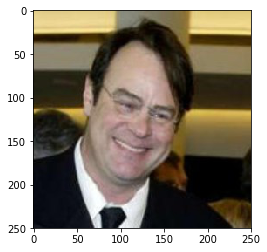

Hello human! You look like ...
 Plott !


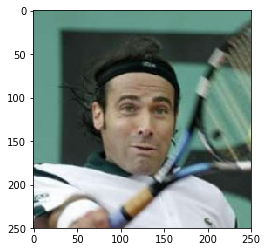

Hello human! You look like ...
 Afghan hound !


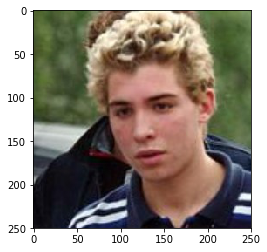

Hello dog! You look like ...
 Portuguese water dog !


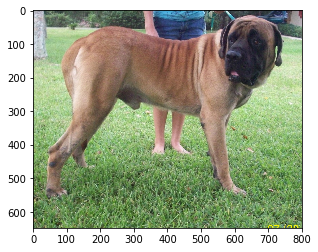

Hello dog! You look like ...
 Lakeland terrier !


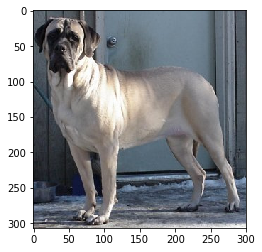

Hello dog! You look like ...
 Portuguese water dog !


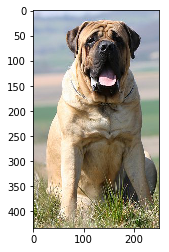

In [27]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)



Hello human! You look like ...
 Portuguese water dog !


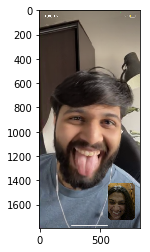

Hello dog! You look like ...
 Chinese crested !


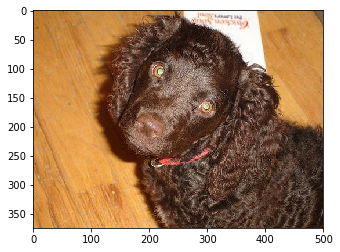

Hello human! You look like ...
 Anatolian shepherd dog !


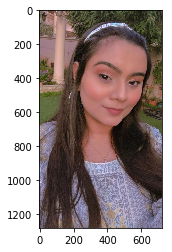

Hello dog! You look like ...
 Canaan dog !


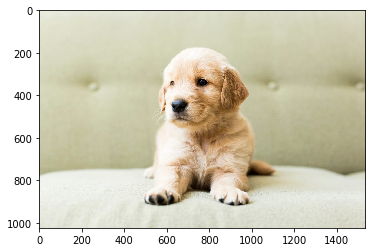

Hello dog! You look like ...
 Chinese crested !


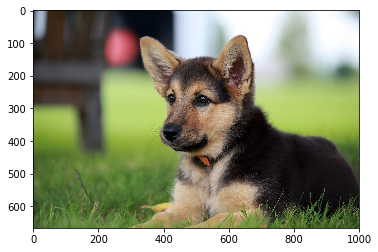

Hello human! You look like ...
 Afghan hound !


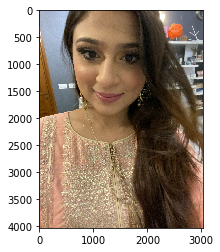

Hello dog! You look like ...
 Afghan hound !


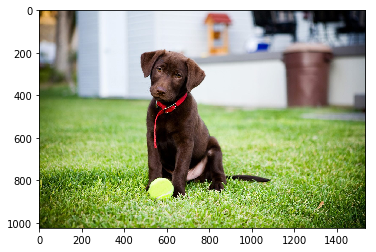

In [28]:
my_imgs = np.array(glob("test_imgs/*"))
for file in my_imgs:
    run_app(file)